<a href="https://colab.research.google.com/github/priyabodke41/Regression_capstone_project/blob/main/Regression_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV



In [2]:
plt.style.use('seaborn')
plt.rcParams['axes.titlesize']=16
plt.rcParams['axes.titleweight']='bold'
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.labelsize']=15
plt.rcParams['font.weight']='bold'
plt.rcParams['legend.fontsize']=12
plt.rcParams['legend.title_fontsize']=12

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
stockdata= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_YesBank_StockPrices (1).csv")
stockdata

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [35]:
stockdata.shape

(185, 5)

In [6]:
stockdata.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [7]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


**We have 185 rows and 4 columns in our dataset with no null values. Here our dependent variable will be Close, and independent variables are - Open, High and Low.**

**Date: It denotes the month and year of the for a particular price.**
**Open: Open means the price at which a stock started trading that month.**
**High: refers to the maximum price that month.**
**Low: refers to the minimum price that month.**
**Close: refers to the final trading price for that month, which we have to predict using regression**

In [8]:
#checking for null values
stockdata.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

No missing values in dataset.

In [9]:
#checking for duplicate values
stockdata.duplicated().sum()

0

No duplicate values in dataset

In [10]:
from datetime import datetime
stockdata['Date'] = stockdata['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [11]:
stockdata.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


**Exploratory Data Analysis**

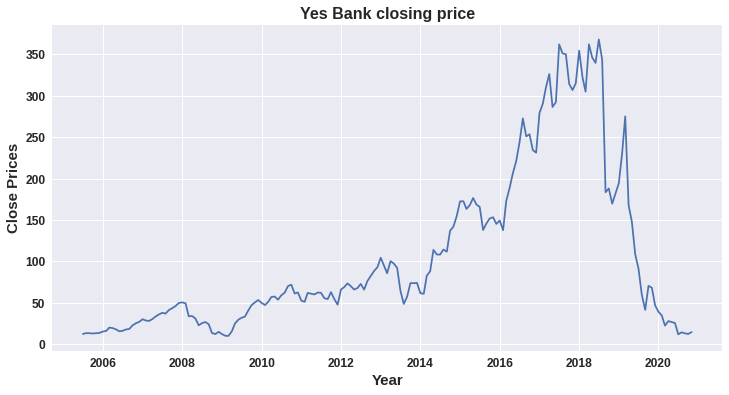

In [12]:
#visualising closing price on year basis
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Close Prices')
plt.plot(stockdata['Date'], stockdata['Close'])
plt.title('Yes Bank closing price')
plt.show()

**Distribution of dependant variable**
**(Close Price of stock)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


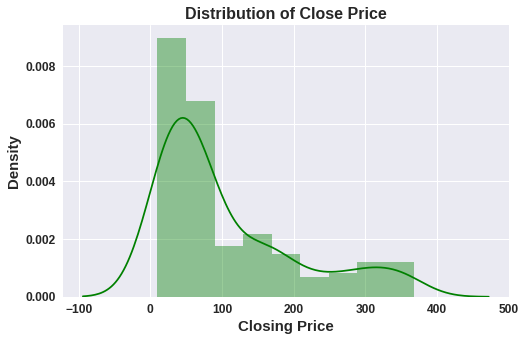

In [13]:
plt.figure(figsize=(8,5))
sns.distplot(stockdata['Close'],color="g")
plt.title('Distribution of Close Price')
plt.xlabel('Closing Price')
plt.ylabel('Density')
plt.show()

Closing price Distribution Plot is right side skewed so to make it normal distribution apply log transformation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


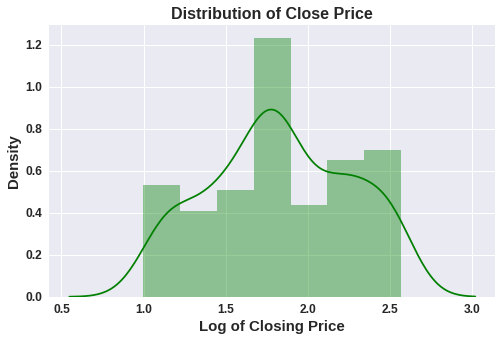

In [14]:
plt.figure(figsize=(8,5))
sns.distplot(np.log10(stockdata['Close']),color='green')
plt.title('Distribution of Close Price')
plt.xlabel('Log of Closing Price')
plt.ylabel('Density')
plt.show()

After applying log transformation, distribution of closing price is more normal.

**Distribution of independant variable (Open,High,Low Prices of stock)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


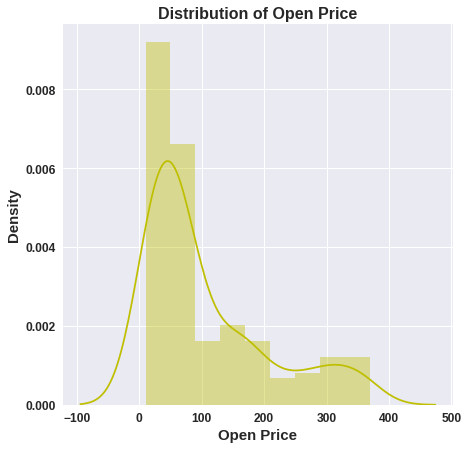

In [15]:
plt.figure(figsize=(7,7))
sns.distplot(stockdata['Open'],color="y")
plt.title('Distribution of Open Price')
plt.xlabel('Open Price')
plt.ylabel('Density')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


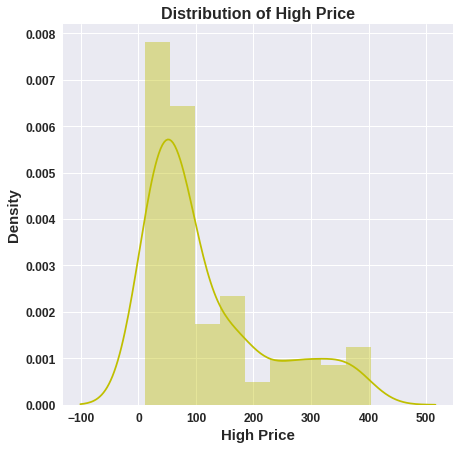

In [16]:
plt.figure(figsize=(7,7))
sns.distplot(stockdata['High'],color="y")
plt.title('Distribution of High Price')
plt.xlabel('High Price')
plt.ylabel('Density')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


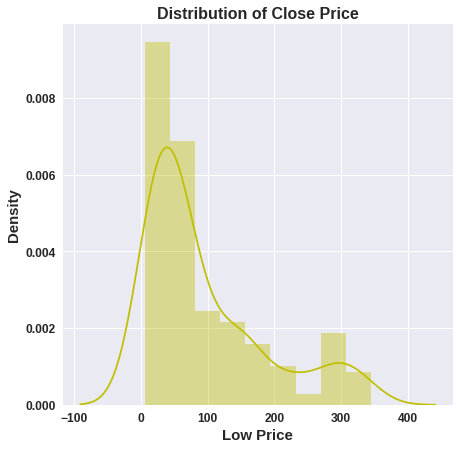

In [17]:
plt.figure(figsize=(7,7))
sns.distplot(stockdata['Low'],color="y")
plt.title('Distribution of Close Price')
plt.xlabel('Low Price')
plt.ylabel('Density')
plt.show()

**Plotting distribution for each of numerical features by applying log transformation**

In [18]:
features=list(set(stockdata.describe().columns) - {'Close'})


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<function matplotlib.pyplot.show(*args, **kw)>

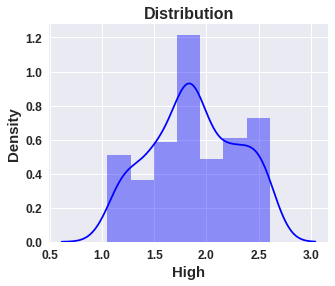

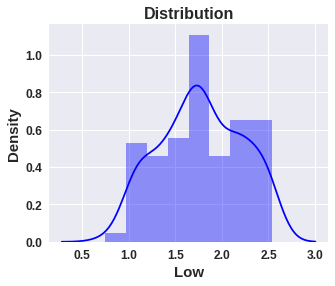

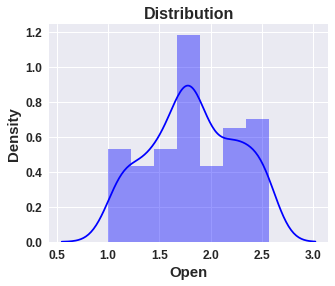

In [33]:
for col in features:
    plt.figure(figsize=(5,4))
    sns.distplot(np.log10(stockdata[col]), color='blue')
    plt.title("Distribution")
    plt.xlabel(col)
    plt.ylabel('Density')
plt.show


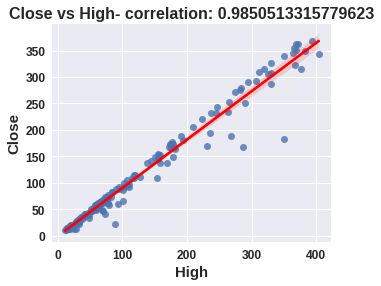

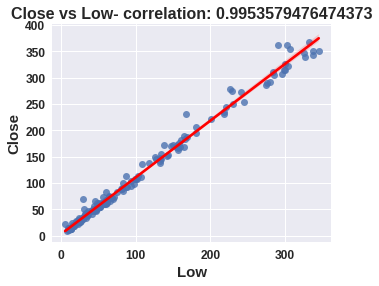

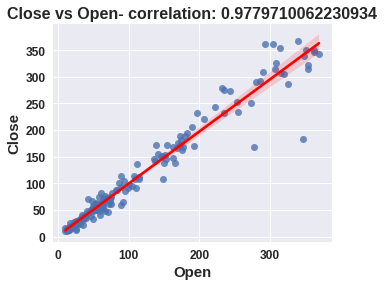

In [20]:
for col in features:
  fig=plt.figure(figsize=(5,4))
  ax=fig.gca()
  feature=stockdata[col]
  label=stockdata['Close']
  correlation= feature.corr(label)
  sns.regplot(x=stockdata[col],y=stockdata["Close"],line_kws={"color": "red"})
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' +col +'- correlation: '+ str(correlation))

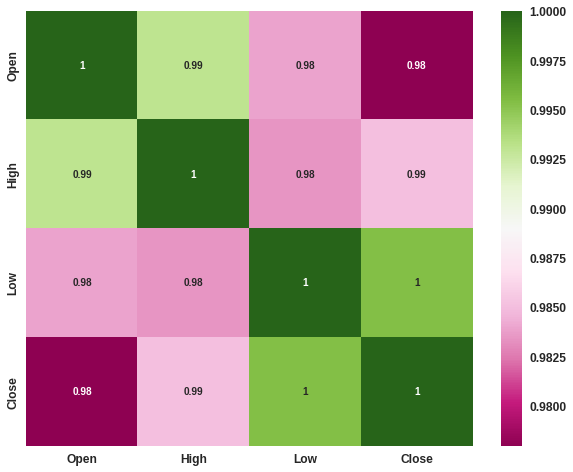

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(stockdata.corr(),cmap='PiYG',annot=True)

All variables shows high correlation with each other.

In [58]:
X = stockdata.drop(columns=['Close','Date'])
y = np.log10(stockdata['Close'])

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [60]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [61]:
#checking shape of training dataset.
X_train.shape

(148, 3)

In [62]:
X_test.shape

(37, 3)

In [63]:
regressor = LinearRegression()
regressor = regressor.fit(X_train,y_train)

In [64]:
round(regressor.score(X_train,y_train), 3)

0.815

In [65]:
round(regressor.score(X_test,y_test), 3)

0.823

In [67]:
y_pred = regressor.predict(X_test)

Evaluation Metrics of Linear Regression

In [68]:
print("MSE :",round(mean_squared_error(y_test, y_pred), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred),3))
print("R2 :",round(r2_score(y_test, y_pred), 3))

MSE : 0.032
RMSE : 0.178
MAE : 0.151
MAPE : 0.095
R2 : 0.823


Actual Vs predicted Close Price

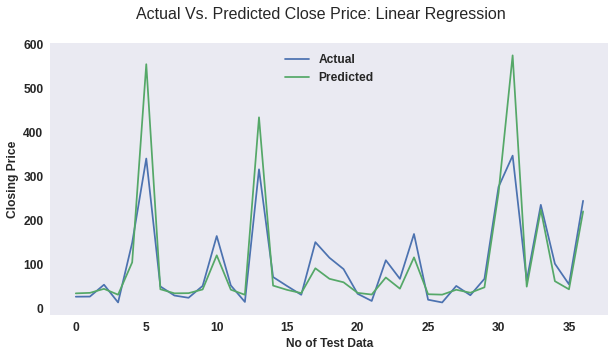

In [72]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()